In [ ]:
#Forbes Highest Paid Athletes 1990-2020

In [67]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [68]:
def lerArquivo(name):
    df = pd.read_csv(name)
    return df 

In [69]:
df = pd.DataFrame(lerArquivo('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv'))


In [70]:
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


Tipos de dados

In [71]:
df.dtypes

S.NO                      int64
Name                     object
Nationality              object
Current Rank              int64
Previous Year Rank       object
Sport                    object
Year                      int64
earnings ($ million)    float64
dtype: object

In [72]:
# Campos Nulos
df.isnull().sum()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

In [73]:
# Analisar o tipo da informação
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [74]:
# Analises Estatisticas
df.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


In [75]:
#Selecionando as colunas
colunasSelecionadas = ['earnings ($ million)']

#Fazendo a filtragem das colunas selecionadas
df_colunas_selecionadas = df.filter(items=colunasSelecionadas)
df_colunas_selecionadas.head()

,earnings ($ million)
0,28.6
1,26.0
2,13.0
3,10.0
4,9.0


In [76]:
#media
df_colunas_selecionadas.mean()

earnings ($ million)    45.516279
dtype: float64

In [77]:
#mediana da coluna earnings ($ million)
df_colunas_selecionadas.median()

earnings ($ million)    39.0
dtype: float64

In [78]:
df_colunas_selecionadas.mode()

,earnings ($ million)
0,35.0
1,40.0


In [144]:
df_colunas_selecionadas.skew()

earnings ($ million)    3.101979
dtype: float64

In [83]:
#Seleciona as duas colunas Year e valor
colunasSelecionadas = ['Year','earnings ($ million)']

In [84]:
#Fazendo a filtragem das colunas selecionadas
df_colunasSelecionadas = df.filter(items=colunasSelecionadas)
df_colunasSelecionadas

,Year,earnings ($ million)
0,1990,28.6
1,1990,26.0
2,1990,13.0
3,1990,10.0
4,1990,9.0
...,...,...
296,2020,74.4
297,2020,63.9
298,2020,62.3
299,2020,60.5


In [111]:
#Quais valores foram pagos em um mesmo ano ? 
df_colunasSelecionadas.groupby('earnings ($ million)').count()

,Year
earnings ($ million),
8.1,3
8.5,3
8.6,1
9.0,3
9.2,1
...,...
115.0,1
127.0,1
160.0,1


array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

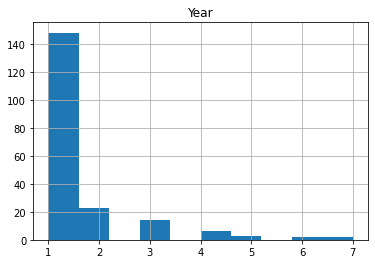

In [110]:
#Quais valores foram pagos em um mesmo ano ? 
df_colunasSelecionadas.groupby('earnings ($ million)').count().hist()

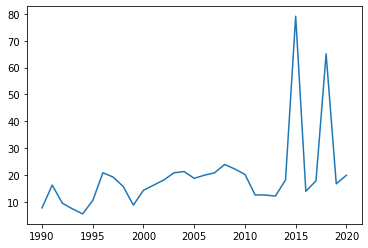

In [127]:
plt.plot(df_colunasSelecionadas.groupby(['Year']).describe()['earnings ($ million)']['std'])

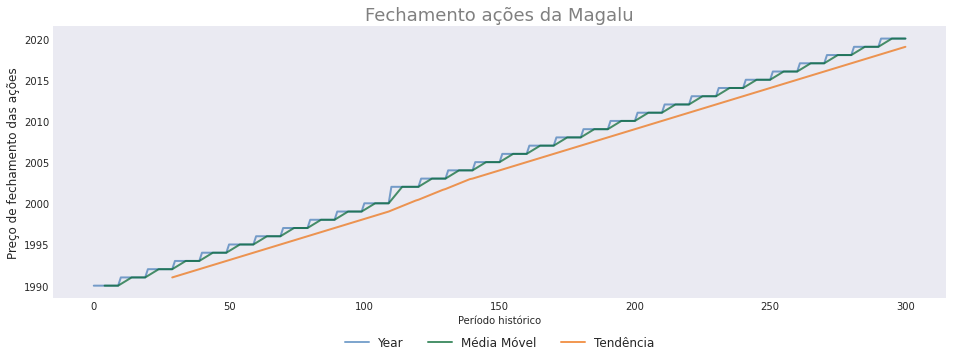

In [141]:
# Estilo
plt.style.use('seaborn-dark')

# Tamanho
plt.figure( figsize=(16,5) )

# Calculando a media móvel
Media_Movel = df_colunasSelecionadas['Year'].rolling(5).mean()
Media_Tendencia = df_colunasSelecionadas['Year'].rolling(30).mean()

# Plotando a ação espeficifico
plt.plot( df_colunasSelecionadas.index, df_colunasSelecionadas['Year'], color='#004E9F', linewidth=2, alpha=0.5)
plt.plot( df_colunasSelecionadas.index, Media_Movel, color='#00652E', linewidth=2, alpha=0.7 )
plt.plot( df_colunasSelecionadas.index, Media_Tendencia, color='#ED6E0C', linewidth=2, alpha=0.7 )

plt.legend( ['Year', 'Média Móvel', 'Tendência'], ncol=4, fontsize=12, loc='upper center',
           bbox_to_anchor=(0.5, -0.1), shadow=True )

plt.xlabel('Período histórico')
plt.ylabel('Preço de fechamento das ações', fontsize=12)

plt.title('Fechamento ações da Magalu', 
          loc='center', fontsize=18, fontweight=0, color='gray');

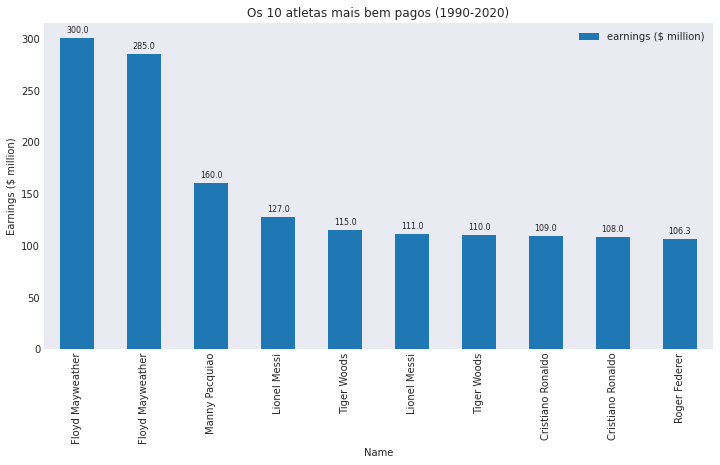

In [148]:
plot=df.sort_values('earnings ($ million)',ascending=False).head(10).plot.bar(x='Name',y='earnings ($ million)',figsize=(12,6));
plt.title('Os 10 atletas mais bem pagos (1990-2020)');
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.1f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha = 'center', va = 'center', 
                   size=8,xytext = (0, 8), 
                   textcoords = 'offset points')
plt.ylabel('Earnings ($ million)');

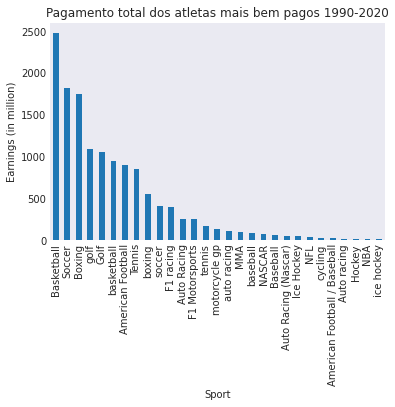

In [150]:
df.groupby('Sport')['earnings ($ million)'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Earnings (in million)')
plt.xlabel('Sport')
plt.title('Pagamento total dos atletas mais bem pagos 1990-2020')
plt.show();